In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
from scipy.io import loadmat
from pathlib import Path
import ants


In [31]:
atlas_reg_path = '/home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/atlas-registration/atlas__t1c.mat'
atlas_reg = loadmat(atlas_reg_path)
# inv_atlas_reg = loadmat('example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/atlas-registration/atlas__t1c_inv.mat')
# atlas_reg, inv_atlas_reg

In [10]:

t1c_flair_coreg_path = Path('/home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/co-registration/co__t1c__flair.mat')
t1c_flair_coreg = loadmat(t1c_flair_coreg_path)
# inv_t1c_flair_coreg = loadmat('example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/co-registration/co__t1c__flair_inv.mat')
# t1c_flair_coreg, inv_t1c_flair_coreg

In [34]:
atlas_img_path = Path('/home/marcelrosier/preprocessing/brainles_preprocessing/registration/atlases/atlases_v1.0.0/brats_sri24.nii')
t1c_img_path = Path('/home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/AX_T1_POST_GD_FLAIR_TCGA-DU-7294_TCGA-DU-7294_GE_TCGA-DU-7294_AX_T1_POST_GD_FLAIR_RM_13_t1c.nii.gz')
flair_img_path = Path('/home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/AXIAL_FLAIR_RF2_150_TCGA-DU-7294_TCGA-DU-7294_GE_TCGA-DU-7294_AXIAL_FLAIR_RF2_150_IR_7_fla.nii.gz')

assert atlas_img_path.exists(), f'Atlas path {atlas_img_path} does not exist.'
assert t1c_img_path.exists(), f'T1c image path {t1c_img_path} does not exist.'
assert flair_img_path.exists(), f'Flair image path {flair_img_path} does not exist.'

atlas_img = ants.image_read(str(atlas_img_path))
t1c_img = ants.image_read(str(t1c_img_path))
flair_img = ants.image_read(str(flair_img_path))

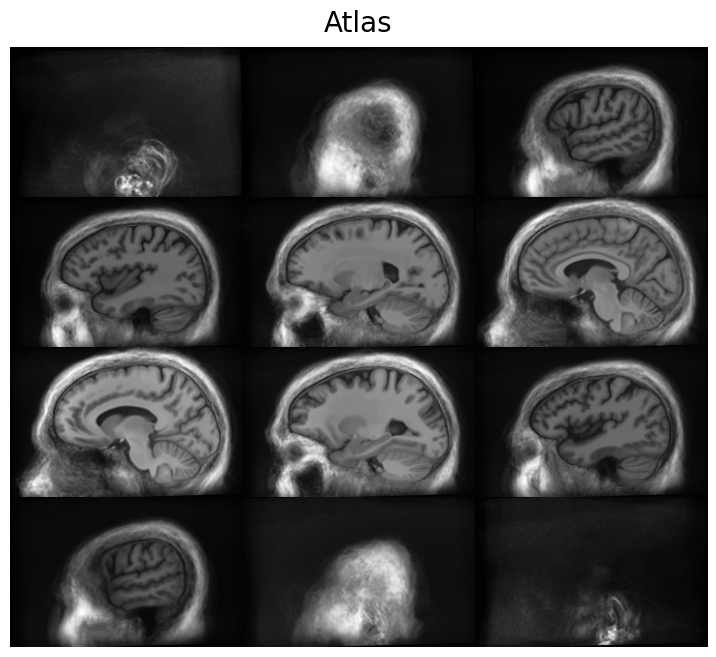

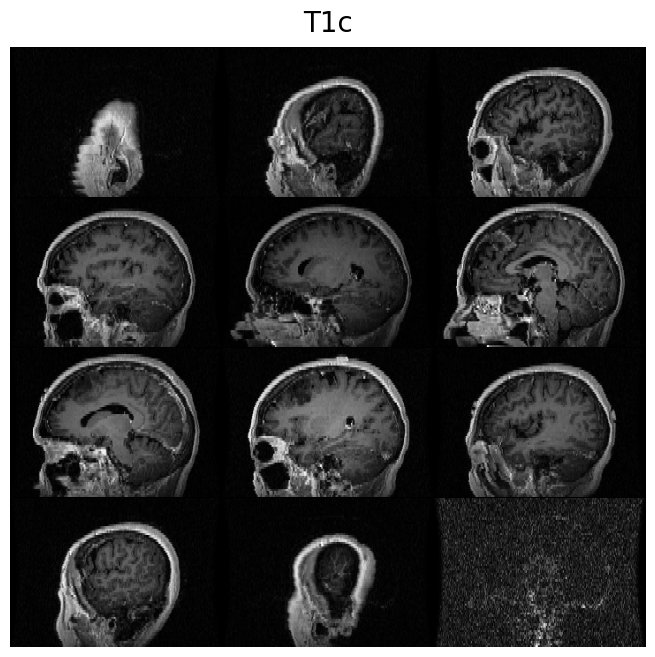

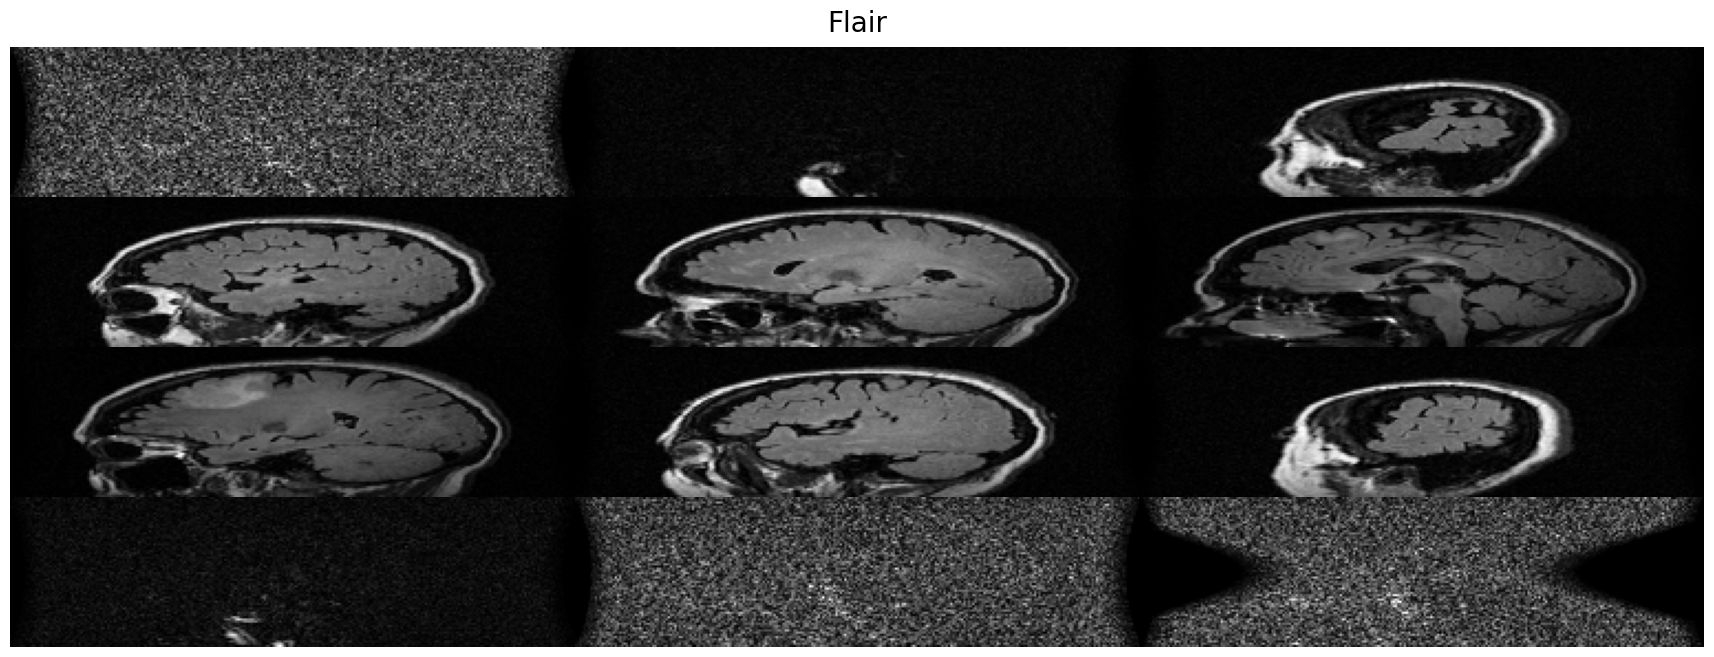

In [36]:
for img_path,title in zip([atlas_img_path, t1c_img_path, flair_img_path],["Atlas", "T1c", "Flair"]):
    ants.plot(ants.image_read(str(img_path)), title=title)

In [11]:
t1c_flair_coreg_path.exists()

True

['-d', '3', '-i', '0x19cd1590', '-o', '0x17d6e600', '-r', '0x190ebd50', '-n', 'linear', '-t', '/home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/co-registration/co__t1c__flair.mat']
Using single precision for computations.
Input scalar image: 0x19cd1590
Reference image: 0x190ebd50
The composite transform comprises the following transforms (in order): 
  1. /home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/co-registration/co__t1c__flair.mat (type = AffineTransform)
Default pixel value: 0
Interpolation type: LinearInterpolateImageFunction
Output warped image: 0x17d6e600


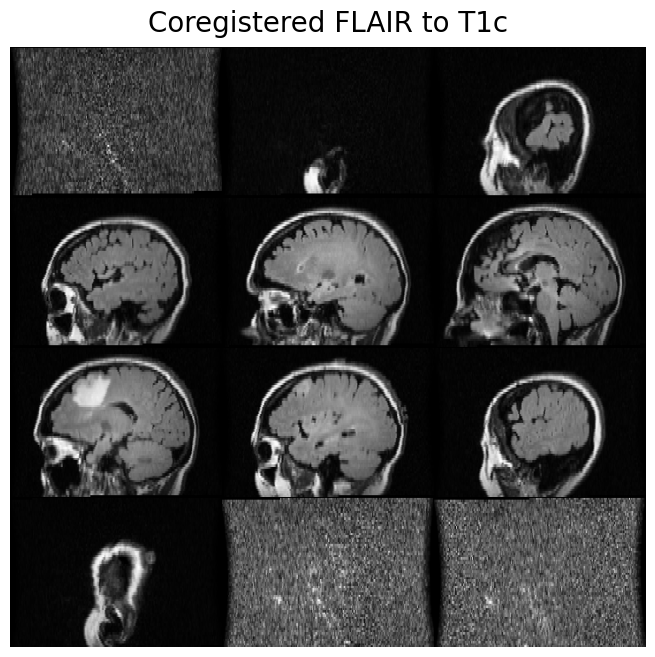

In [30]:
coreg_img = ants.apply_transforms(
    fixed=t1c_img,
    moving=flair_img,
    transformlist=['/home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/co-registration/co__t1c__flair.mat'],
    verbose=True,
    # **default_kwargs
)

ants.plot(coreg_img, title='Coregistered FLAIR to T1c')

['-d', '3', '-i', '0x176caba0', '-o', '0x182ba490', '-r', '0x176804e0', '-n', 'linear', '-t', '/home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/atlas-registration/atlas__t1c.mat']
Using single precision for computations.
Input scalar image: 0x176caba0
Reference image: 0x176804e0
The composite transform comprises the following transforms (in order): 
  1. /home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/atlas-registration/atlas__t1c.mat (type = AffineTransform)
Default pixel value: 0
Interpolation type: LinearInterpolateImageFunction
Output warped image: 0x182ba490


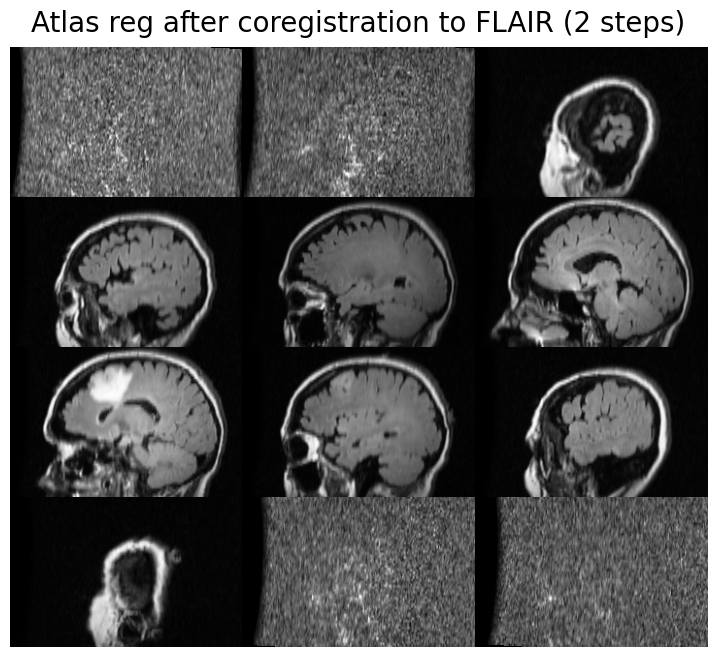

In [32]:
atlas_after_coreg_img = ants.apply_transforms(
    fixed=atlas_img,
    moving=coreg_img,
    transformlist=[atlas_reg_path],
    verbose=True,
)
ants.plot(atlas_after_coreg_img, title='Atlas reg after coregistration to FLAIR (2 steps)')

['-d', '3', '-i', '0x189487f0', '-o', '0x17470180', '-r', '0x18948810', '-n', 'linear', '-t', '/home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/atlas-registration/atlas__t1c.mat', '-t', '/home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/co-registration/co__t1c__flair.mat']
Using single precision for computations.
Input scalar image: 0x189487f0
Reference image: 0x18948810
The composite transform comprises the following transforms (in order): 
  1. /home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/co-registration/co__t1c__flair.mat (type = AffineTransform)
  2. /home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/atlas-registration/atlas__t1c.mat (type = AffineTransform)
Default pixel value: 0
Interpolation type: LinearInterpolateImageFunction
Output warped image: 0x17470180


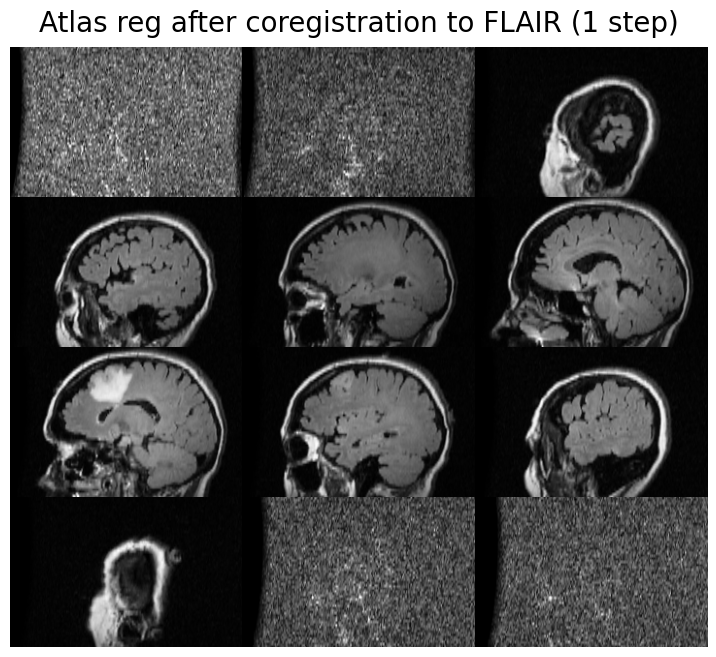

In [43]:
# single step registration
atlas_after_coreg_img_single_step = ants.apply_transforms(
    fixed=atlas_img,
    moving=flair_img,
    transformlist=[str(atlas_reg_path), str(t1c_flair_coreg_path)], # transforms are applied in inverse order!!!!
    verbose=True,
)
ants.plot(atlas_after_coreg_img_single_step, title='Atlas reg after coregistration to FLAIR (1 step)')

In [ ]:
# single step registration
back_to_native_img = ants.apply_transforms(
    fixed=flair_img,
    moving=atlas_img,
    transformlist=[
        str(t1c_flair_coreg_path),
        str(atlas_reg_path),
    ],  # transforms are applied in inverse order!!!!
    whichtoinvert=[True, True],
)
ants.plot(back_to_native_img, title="Back to native space (FLAIR)")